In [99]:
# Importing all the libraries I think I need but I may add more as I work

import requests
import pandas as pd
import numpy as np
import datetime

# Function for calling for nio stock data using the bloomberg rapidapi platform and saving it into a json file
def extract_ticks(interval="y5"):
    url = "https://bloomberg-market-and-financial-news.p.rapidapi.com/market/get-chart"
    querystring = {"interval":interval,"id":"nio:us"}
    headers = {
        'x-rapidapi-host': "bloomberg-market-and-financial-news.p.rapidapi.com",
        'x-rapidapi-key': "2ccb7cd12bmsh89f8c499db52954p1372c4jsn9096d08c699c"
        }
    response = requests.request("GET", url, headers=headers, params=querystring)
    json_d = response.json()
    return json_d

json_d = extract_ticks()
print(json_d)

{'result': {'NIO:US': {'historical': True, 'ticksType': 'WeekTick', 'ticks': [{'time': 1537534800, 'close': 8.59, 'volume': 201851495}, {'time': 1538139600, 'close': 6.98, 'volume': 84924695}, {'time': 1538744400, 'close': 6.26, 'volume': 69395134}, {'time': 1539349200, 'close': 7.46, 'volume': 162219723}, {'time': 1539954000, 'close': 7.32, 'volume': 75219527}, {'time': 1540558800, 'close': 6.35, 'volume': 61097779}, {'time': 1541163600, 'close': 6.49, 'volume': 95384704}, {'time': 1541772000, 'close': 6.77, 'volume': 120106706}, {'time': 1542376800, 'close': 7.19, 'volume': 90677172}, {'time': 1542981600, 'close': 7.46, 'volume': 98208241}, {'time': 1543586400, 'close': 7.71, 'volume': 67549053}, {'time': 1544191200, 'close': 6.99, 'volume': 70225486}, {'time': 1544796000, 'close': 7.7, 'volume': 59838779}, {'time': 1545400800, 'close': 6.07, 'volume': 63796606}, {'time': 1546005600, 'close': 6.47, 'volume': 35276548}, {'time': 1546610400, 'close': 6.36, 'volume': 34459492}, {'time':

In [100]:
# Write the data to json file
import json

with open("nio_y5.json","w") as fp:
    json.dump(json_d,fp)

In [107]:
# Reading the json file into a dataframe

with open("nio_y5.json","r") as fp:
    json_d = json.load(fp)
ticks_d = json_d['result']['NIO:US']['ticks']
nio = pd.DataFrame(ticks_d)
nio

,time,close,volume
0,1537534800,8.59,201851495
1,1538139600,6.98,84924695
2,1538744400,6.26,69395134
3,1539349200,7.46,162219723
4,1539954000,7.32,75219527
...,...,...,...
122,1611324000,61.95,401582308
123,1611928800,57.00,408091276
124,1612533600,56.67,317960581
125,1613138400,59.85,347843854


In [108]:
# This time pulling data from Tesla

def extract_ticks(interval="y5"):
    url = "https://bloomberg-market-and-financial-news.p.rapidapi.com/market/get-chart"
    querystring = {"interval":interval,"id":"tsla:us"}
    headers = {
        'x-rapidapi-host': "bloomberg-market-and-financial-news.p.rapidapi.com",
        'x-rapidapi-key': "2ccb7cd12bmsh89f8c499db52954p1372c4jsn9096d08c699c"
        }
    response = requests.request("GET", url, headers=headers, params=querystring)
    json_e = response.json()
    return json_e

json_e= extract_ticks()
print(json_e)

{'result': {'TSLA:US': {'historical': True, 'ticksType': 'WeekTick', 'ticks': [{'time': 1456495200, 'close': 38.068, 'volume': 141279460}, {'time': 1457100000, 'close': 40.208, 'volume': 136958140}, {'time': 1457704800, 'close': 41.5, 'volume': 106299595}, {'time': 1458306000, 'close': 46.548, 'volume': 96287725}, {'time': 1458910800, 'close': 45.55, 'volume': 97667755}, {'time': 1459515600, 'close': 47.518, 'volume': 179916890}, {'time': 1460120400, 'close': 50.014, 'volume': 256748055}, {'time': 1460725200, 'close': 50.902, 'volume': 138675235}, {'time': 1461330000, 'close': 50.75, 'volume': 111961625}, {'time': 1461934800, 'close': 48.152, 'volume': 90163860}, {'time': 1462539600, 'close': 42.986, 'volume': 168933400}, {'time': 1463144400, 'close': 41.522, 'volume': 102410600}, {'time': 1463749200, 'close': 44.056, 'volume': 136419545}, {'time': 1464354000, 'close': 44.608, 'volume': 94858165}, {'time': 1464958800, 'close': 43.798, 'volume': 50167495}, {'time': 1465563600, 'close': 

In [109]:
# Write the data to a json file

with open("tesla_y5.json","w") as fp:
    json.dump(json_e,fp)

In [112]:
# Transform the json file to a dataframe

with open("tesla_y5.json","r") as fp:
    json_e = json.load(fp)
ticks_e = json_e['result']['TSLA:US']['ticks']
tesla = pd.DataFrame(ticks_e)
tesla

,time,close,volume
0,1456495200,38.068,141279460
1,1457100000,40.208,136958140
2,1457704800,41.500,106299595
3,1458306000,46.548,96287725
4,1458910800,45.550,97667755
...,...,...,...
256,1611324000,846.640,91697493
257,1611928800,793.530,153007757
258,1612533600,852.230,102460406
259,1613138400,816.120,116926526


In [113]:
# Concantenate both the nio and the tesla dfs together

df = pd.concat([nio, tesla],axis=1)
df

In [116]:
# Updating the headers

df.columns = ['Time', 'Nio Close', 'Nio Vol', 'Time', 'Tesla Close', 'Tesla Vol']
df

,Time,Nio Close,Nio Vol,Time,Tesla Close,Tesla Vol
0,1.537535e+09,8.59,201851495.0,1456495200,38.068,141279460
1,1.538140e+09,6.98,84924695.0,1457100000,40.208,136958140
2,1.538744e+09,6.26,69395134.0,1457704800,41.500,106299595
3,1.539349e+09,7.46,162219723.0,1458306000,46.548,96287725
4,1.539954e+09,7.32,75219527.0,1458910800,45.550,97667755
...,...,...,...,...,...,...
256,NaN,NaN,NaN,1611324000,846.640,91697493
257,NaN,NaN,NaN,1611928800,793.530,153007757
258,NaN,NaN,NaN,1612533600,852.230,102460406
259,NaN,NaN,NaN,1613138400,816.120,116926526


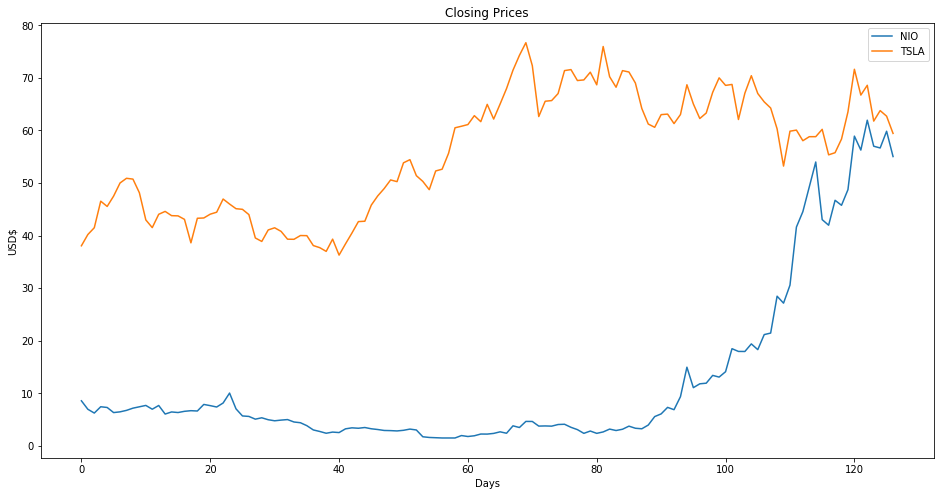

In [124]:
# Quick plot of the closing data from each stock and I only look at the first 127 rows since Nio doesn't have data beyond that

df['Nio Close'].plot(label='NIO', figsize=(16,8), title='Closing Prices')
df['Tesla Close'].iloc[:127].plot(label="TSLA")
plt.xlabel ('Days')
plt.ylabel ('USD$')
plt.legend()

C:\Users\Chris\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


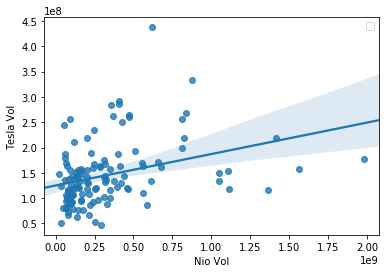

In [120]:
import matplotlib.pylab as plt
import seaborn as sns
# Generating a stock scatter plot, use nio vol for x and tesla vol for y to start

sns.regplot(x=df['Nio Vol'], y=df['Tesla Vol'])
plt.legend(loc='upper right')


In [121]:
# Taking a look at the descriptive statistics

df.describe()

,Time,Nio Close,Nio Vol,Time,Tesla Close,Tesla Vol
count,1.270000e+02,127.000000,1.270000e+02,2.610000e+02,261.000000,2.610000e+02
mean,1.575639e+09,12.271575,3.218966e+08,1.535117e+09,124.777762,2.119930e+08
std,2.226023e+07,16.026800,3.344024e+08,4.565559e+07,170.400012,1.275401e+08
min,1.537535e+09,1.510000,2.471252e+07,1.456495e+09,36.294000,4.731300e+07
25%,1.556586e+09,3.195000,1.043643e+08,1.495804e+09,48.946000,1.296303e+08
50%,1.575641e+09,5.620000,2.063884e+08,1.535116e+09,62.644000,1.697167e+08
75%,1.594688e+09,11.455000,4.048368e+08,1.574431e+09,73.142000,2.583663e+08
max,1.613743e+09,61.950000,1.979849e+09,1.613743e+09,880.020000,1.067702e+09
